# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [1]:
import pandas as pd
import numpy as np

- CCTV 데이터

In [2]:
cctv_seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")
cctv_seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [3]:
list(cctv_seoul.columns)

['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년']

In [4]:
cctv_seoul.columns[0]

'기관명'

In [5]:
cctv_seoul.rename(
    columns={cctv_seoul.columns[0]:"구별"}, 
    inplace=True
)
cctv_seoul.tail(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


- 인구수 데이터

In [6]:
pop_seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", 
    header=2, 
    usecols="B, D, G, J, N"
)
pop_seoul.head(5)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [7]:
pop_seoul.rename(
    columns={
        pop_seoul.columns[0] : "구별",
        pop_seoul.columns[1] : "인구수",
        pop_seoul.columns[2] : "한국인",
        pop_seoul.columns[3] : "외국인",
        pop_seoul.columns[4] : "고령자"
    },
    inplace=True
)
pop_seoul.head(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## Pandas 기초 
- Python 에서 R만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드 맞은 엑셀로 표현

#### Series
- index와 value로 이루어져 있습니다.
- 한 가지 데이터 타입만 가질 수 있습니다.

In [8]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [9]:
data = {"A":1, "B":2, "C":3}
pd.Series(data=data, index=list(data.keys()), dtype="float")

A    1.0
B    2.0
C    3.0
dtype: float64

In [10]:
pd.Series(index=[1,2,3,4,5,6], data=[1,2,3,4,5,6], dtype=str)

1    1
2    2
3    3
4    4
5    5
6    6
dtype: object

In [11]:
pd.Series({"key1":"value1", "key2":"value2", "key3":"value3"})

key1    value1
key2    value2
key3    value3
dtype: object

In [16]:
data = pd.Series([1, 2, 3, 4, "5"], dtype=np.int32)
data

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
C:\Users\jmkim\AppData\Local\Temp/ipykernel_19860/868290262.py:1: FutureWarning: Values are too large to be losslessly cast to int32. In a future version this will raise OverflowError. To retain the old behavior, use pd.Series(values).astype(int32)
  data = pd.Series([1, 2, 3, 4, "5"], dtype=np.int32)


0    1
1    2
2    3
3    4
4    5
dtype: int32

In [17]:
data % 2

0    1
1    0
2    1
3    0
4    1
dtype: int32

In [18]:
pd.date_range("2013-01-01 00:00:00", periods=7, freq="H")

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
pd.date_range(start="2021-09-16 00:00:00", end="2021-09-17 00:00:00", freq="2H")

DatetimeIndex(['2021-09-16 00:00:00', '2021-09-16 02:00:00',
               '2021-09-16 04:00:00', '2021-09-16 06:00:00',
               '2021-09-16 08:00:00', '2021-09-16 10:00:00',
               '2021-09-16 12:00:00', '2021-09-16 14:00:00',
               '2021-09-16 16:00:00', '2021-09-16 18:00:00',
               '2021-09-16 20:00:00', '2021-09-16 22:00:00',
               '2021-09-17 00:00:00'],
              dtype='datetime64[ns]', freq='2H')

#### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index. value, column

In [20]:
data = np.random.randn(6, 4)
data

array([[ 0.68661927, -0.25885944, -0.73946621, -2.28922788],
       [ 0.77136033, -0.13407162, -0.20155032,  0.73611986],
       [ 0.59338695,  0.6895404 ,  0.54025884, -0.82505336],
       [-0.97049649,  0.28939409, -2.16044646,  1.36251518],
       [-0.33556869, -0.75158563,  0.13214056, -1.42550647],
       [-2.34359408, -0.05549314, -0.70463415,  0.7896864 ]])

In [21]:
index = pd.date_range('2021-09-16', periods=6)
index

DatetimeIndex(['2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df = pd.DataFrame(data=data, index=index, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


### 데이터프레임 정보 탐색
- df.head()

In [23]:
df.head(3)

,A,B,C,D
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-18,0.593387,0.689540,0.540259,-0.825053


In [24]:
df.tail(3)

,A,B,C,D
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [25]:
df.index

DatetimeIndex(['2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19',
               '2021-09-20', '2021-09-21'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [27]:
df.values

array([[ 0.68661927, -0.25885944, -0.73946621, -2.28922788],
       [ 0.77136033, -0.13407162, -0.20155032,  0.73611986],
       [ 0.59338695,  0.6895404 ,  0.54025884, -0.82505336],
       [-0.97049649,  0.28939409, -2.16044646,  1.36251518],
       [-0.33556869, -0.75158563,  0.13214056, -1.42550647],
       [-2.34359408, -0.05549314, -0.70463415,  0.7896864 ]])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-09-16 to 2021-09-21
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() 데이터프레임의 기술 통계 정보 확인

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.266382,-0.036846,-0.522283,-0.275244
std,1.227982,0.490716,0.940652,1.450566
min,-2.343594,-0.751586,-2.160446,-2.289228
25%,-0.811765,-0.227662,-0.730758,-1.275393
50%,0.128909,-0.094782,-0.453092,-0.044467
75%,0.663311,0.203172,0.048718,0.776295
max,0.771360,0.689540,0.540259,1.362515


### 데이터 정렬
- sort_values()

In [30]:
df

,A,B,C,D
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [31]:
df.sort_values(by=["A"], ascending=False, inplace=True)

In [32]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [33]:
# 한 개 컬럼 선택
df["A"]

2021-09-17    0.771360
2021-09-16    0.686619
2021-09-18    0.593387
2021-09-20   -0.335569
2021-09-19   -0.970496
2021-09-21   -2.343594
Name: A, dtype: float64

In [34]:
type(df.A)

pandas.core.series.Series

In [35]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2021-09-17,0.771360,-0.134072
2021-09-16,0.686619,-0.258859
2021-09-18,0.593387,0.689540
2021-09-20,-0.335569,-0.751586
2021-09-19,-0.970496,0.289394
2021-09-21,-2.343594,-0.055493


### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우 끝을 포함

In [36]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [37]:
df[1:3]

,A,B,C,D
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053


In [38]:
df["20210917":"20210917"]

,A,B,C,D
2021-09-17,0.77136,-0.134072,-0.20155,0.73612


- loc : location
- index 이름으로 특정, 행, 열을 선택합니다.

In [39]:
df.loc["20210915":"20210917", ["A","B"]]

C:\Users\jmkim\miniconda3\envs\ds_study\lib\site-packages\pandas\core\indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


,A,B
2021-09-17,0.771360,-0.134072
2021-09-16,0.686619,-0.258859


In [41]:
df.loc["20210916", ["A", "B", "C"]]

,A,B,C
2021-09-16,0.686619,-0.258859,-0.739466


- iloc : inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [42]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [43]:
df.iloc[1:3, [1,3]] # 1행부터 3행까지, 1열, 3열의 데이터

,B,D
2021-09-16,-0.258859,-2.289228
2021-09-18,0.689540,-0.825053


In [44]:
df.iloc[3,2] # 3행 2열의 데이터

0.13214055651916837

In [45]:
df.iloc[[1,2,4],[1,2]]

,B,C
2021-09-16,-0.258859,-0.739466
2021-09-18,0.689540,0.540259
2021-09-19,0.289394,-2.160446


In [46]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [47]:
# A컬럼에서 양수만 선택
# 마스킹이라 표현
df[df["A"] > 0]

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053


In [48]:
# NaN : Not a number
df[df>0]

,A,B,C,D
2021-09-17,0.771360,NaN,NaN,0.736120
2021-09-16,0.686619,NaN,NaN,NaN
2021-09-18,0.593387,0.689540,0.540259,NaN
2021-09-20,NaN,NaN,0.132141,NaN
2021-09-19,NaN,0.289394,NaN,1.362515
2021-09-21,NaN,NaN,NaN,0.789686


### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [49]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [50]:
df["E"] = ["Zero", "One", "Two", "Three", "Four", "Five"]
df

,A,B,C,D,E
2021-09-17,0.771360,-0.134072,-0.201550,0.736120,Zero
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228,One
2021-09-18,0.593387,0.689540,0.540259,-0.825053,Two
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506,Three
2021-09-19,-0.970496,0.289394,-2.160446,1.362515,Four
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686,Five


In [51]:
len(df.index)

6

- isin()
- 특정 요소가 있는지 확인

In [52]:
df["E"].isin(["Two", "Three"])

2021-09-17    False
2021-09-16    False
2021-09-18     True
2021-09-20     True
2021-09-19    False
2021-09-21    False
Name: E, dtype: bool

In [53]:
df[df["E"].isin(["Two", "Three"])]

,A,B,C,D,E
2021-09-18,0.593387,0.689540,0.540259,-0.825053,Two
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506,Three


### 특정 컬럼 제거
- del
- drop

In [54]:
del df["E"]
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [55]:
df.drop(["D"], axis=1)

,A,B,C
2021-09-17,0.771360,-0.134072,-0.201550
2021-09-16,0.686619,-0.258859,-0.739466
2021-09-18,0.593387,0.689540,0.540259
2021-09-20,-0.335569,-0.751586,0.132141
2021-09-19,-0.970496,0.289394,-2.160446
2021-09-21,-2.343594,-0.055493,-0.704634


In [56]:
df.drop(columns=["D"])

,A,B,C
2021-09-17,0.771360,-0.134072,-0.201550
2021-09-16,0.686619,-0.258859,-0.739466
2021-09-18,0.593387,0.689540,0.540259
2021-09-20,-0.335569,-0.751586,0.132141
2021-09-19,-0.970496,0.289394,-2.160446
2021-09-21,-2.343594,-0.055493,-0.704634


### apply()

In [57]:
df

,A,B,C,D
2021-09-17,0.771360,-0.134072,-0.201550,0.736120
2021-09-16,0.686619,-0.258859,-0.739466,-2.289228
2021-09-18,0.593387,0.689540,0.540259,-0.825053
2021-09-20,-0.335569,-0.751586,0.132141,-1.425506
2021-09-19,-0.970496,0.289394,-2.160446,1.362515
2021-09-21,-2.343594,-0.055493,-0.704634,0.789686


In [58]:
df["A"].apply("sum")

-1.5982927133104712

In [59]:
df["A"].apply("mean")

-0.2663821188850785

In [60]:
df["A"].apply("max")

0.7713603262130634

In [61]:
df["A"].apply("min")

-2.3435940834487137

In [62]:
df[["A", "B"]].apply("sum")

A   -1.598293
B   -0.221075
dtype: float64

In [63]:
df["A"].apply(np.sum)

2021-09-17    0.771360
2021-09-16    0.686619
2021-09-18    0.593387
2021-09-20   -0.335569
2021-09-19   -0.970496
2021-09-21   -2.343594
Name: A, dtype: float64

In [64]:
df.apply(np.mean)

A   -0.266382
B   -0.036846
C   -0.522283
D   -0.275244
dtype: float64

In [65]:
def plus_minus(num):
    return "plus" if num > 0 else "minus"

df["A"].apply(plus_minus)

2021-09-17     plus
2021-09-16     plus
2021-09-18     plus
2021-09-20    minus
2021-09-19    minus
2021-09-21    minus
Name: A, dtype: object

In [66]:
df["A"].apply(lambda num : "plus" if num < 0 else "minus")

2021-09-17    minus
2021-09-16    minus
2021-09-18    minus
2021-09-20     plus
2021-09-19     plus
2021-09-21     plus
Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [67]:
cctv_seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [68]:
cctv_seoul.tail(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [69]:
cctv_seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [70]:
cctv_seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [71]:
cctv_seoul["최근증가율"] = (
    (cctv_seoul["2016년"] + cctv_seoul["2015년"] + cctv_seoul["2014년"])  / cctv_seoul["2013년도 이전"] * 100
)
cctv_seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구데이터 훑어보기

In [72]:
pop_seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384


In [73]:
pop_seoul.tail(3)

,구별,인구수,한국인,외국인,고령자
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [74]:
pop_seoul.drop(index=0, inplace=True)

In [75]:
pop_seoul.tail(3)

,구별,인구수,한국인,외국인,고령자
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [76]:
pop_seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [77]:
len(pop_seoul["구별"].unique())

25

In [78]:
# 외국인 비율, 고령자 비율
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100

In [79]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [80]:
pop_seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [81]:
pop_seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [82]:
pop_seoul.sort_values(by="외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [83]:
pop_seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [84]:
pop_seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


---

## 4. 두 데이터 합치기

---

### Pandas에서 데이터 프레임을 합치는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [85]:
df_left = pd.DataFrame(
    {
        "key":["K0","K4","K2","K3"],
        "A":["A0","A1", "A2", "A3"],
        "B":["B0","B1", "B2", "B3"],
    }
)
df_left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [86]:
df_right = pd.DataFrame(
    [
        {"key":"K0", "C":"C0", "D":"DO"},
        {"key":"K1", "C":"C1", "D":"D1"},
        {"key":"K2", "C":"C2", "D":"D2"},
        {"key":"K3", "C":"C3", "D":"D3"},
    ]
)
df_right

,key,C,D
0,K0,C0,DO
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 합니다.

In [87]:
pd.merge(left=df_left, right=df_right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,DO
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [88]:
pd.merge(left=df_left, right=df_right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,DO
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
pd.merge(left=df_left, right=df_right, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,DO
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [90]:
pd.merge(left=df_left, right=df_right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,DO
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [91]:
cctv_seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252


In [92]:
pop_seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [93]:
result = pd.merge(left=cctv_seoul, right=pop_seoul, on="구별", how="inner")
result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop

In [94]:
del result["2013년도 이전"]

In [95]:
result.head()

,구별,소계,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [96]:
del result["2014년"]

In [97]:
result.drop(columns=["2015년", "2016년"], inplace=True)

In [98]:
result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [99]:
result.set_index(keys="구별", inplace=True)

In [100]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자 입니다.
- 상관계수가 0.2 이상인 데이터를 비교

In [101]:
result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [102]:
result["CCTV비율"] = result["소계"] / result["인구수"] * 100
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [103]:
result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [104]:
result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

## matplotlib 기초

- Windows matplotlib 한글 설정

In [105]:
from matplotlib import font_manager
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=font_name)
rc('axes', unicode_minus=False)
get_ipython().run_line_magic("matplotlib", "inline")

In [106]:
# %matplotlib inline
# rc('font', family=font_name)

- matplotlib 그래프 기본 형태
```
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()
```

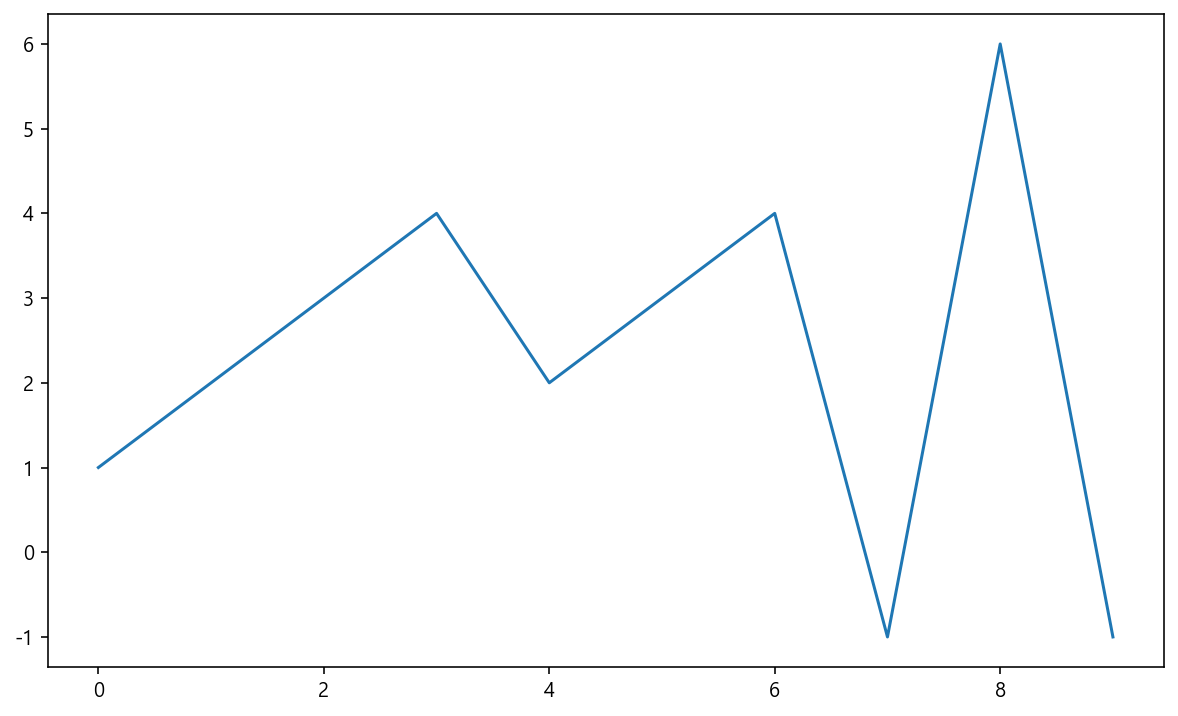

In [113]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,2,3,4,-1,6,-1])
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arange(a,b,s) : a부터 b까지 s간격
- np.sin(value)

In [114]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

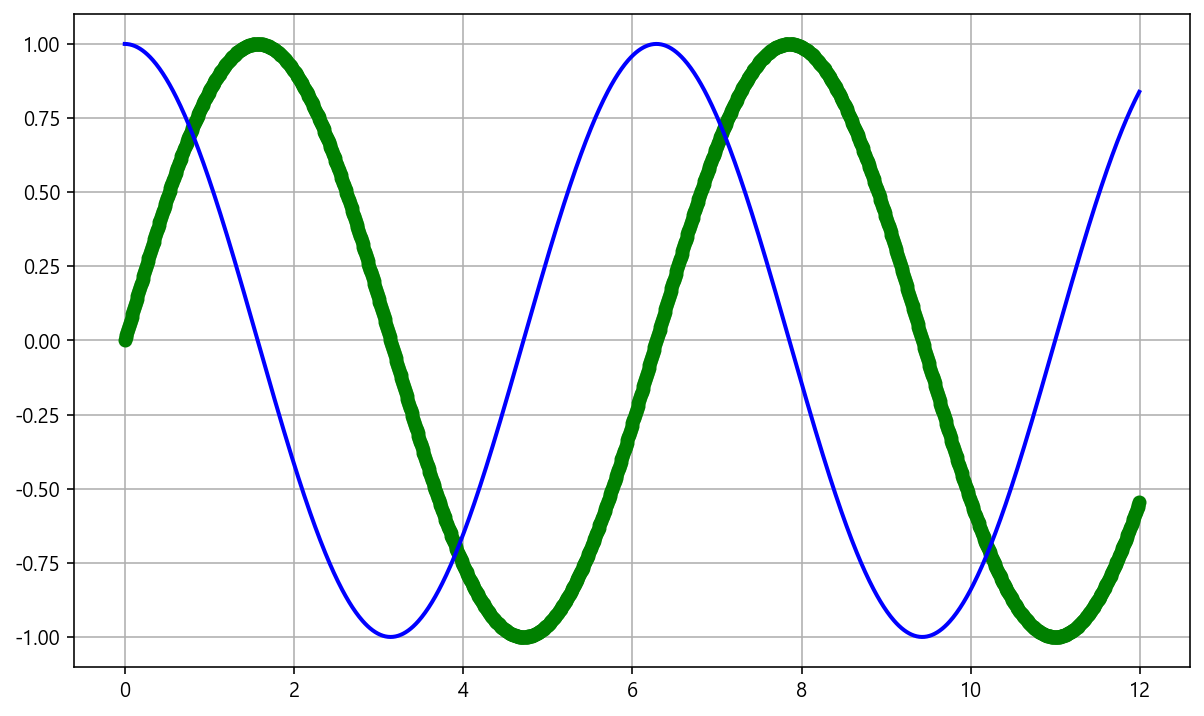

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.sin(t), 'go-', label='line 1', linewidth=2)
plt.plot(x, np.cos(t), 'b-', label='line 1', linewidth=2)
plt.grid(True)
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

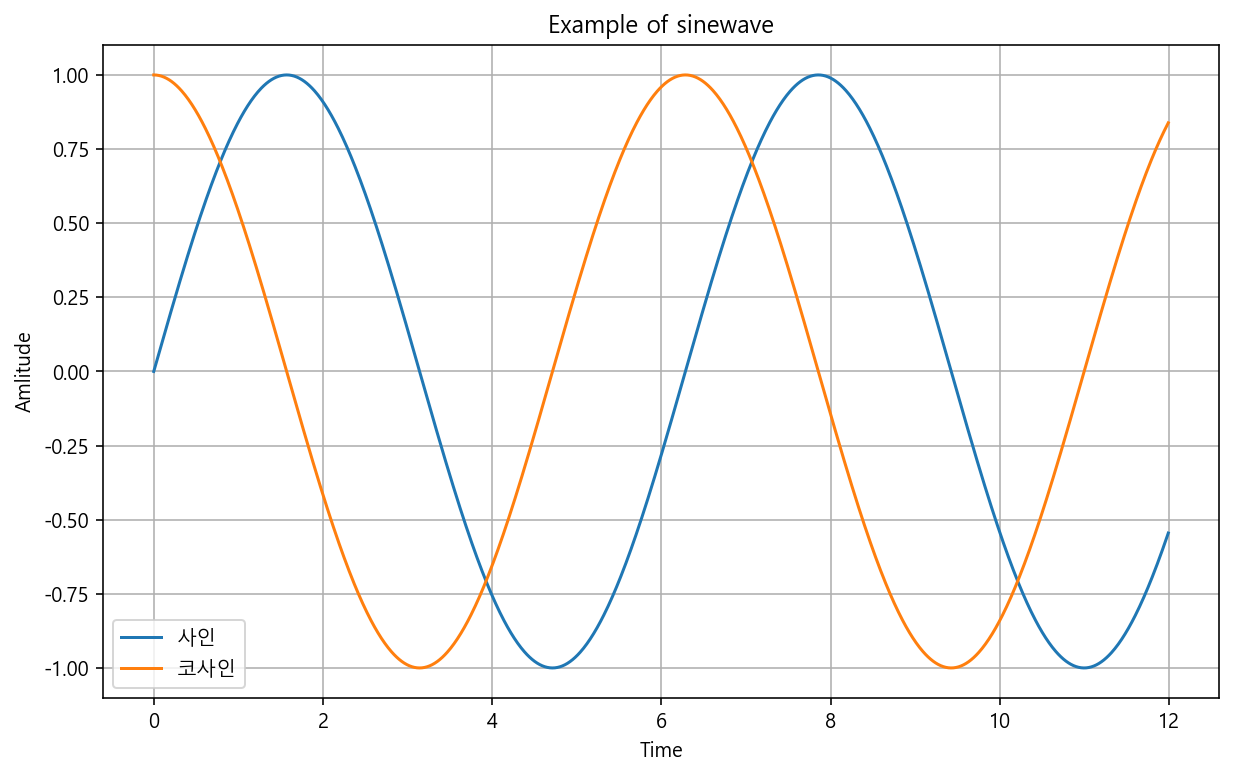

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.sin(t))
plt.plot(x, np.cos(t))
plt.grid(True)
plt.legend(labels=["사인", "코사인"])
plt.title("Example of sinewave")
plt.xlabel("Time")
plt.ylabel("Amlitude") # 진폭
plt.show()

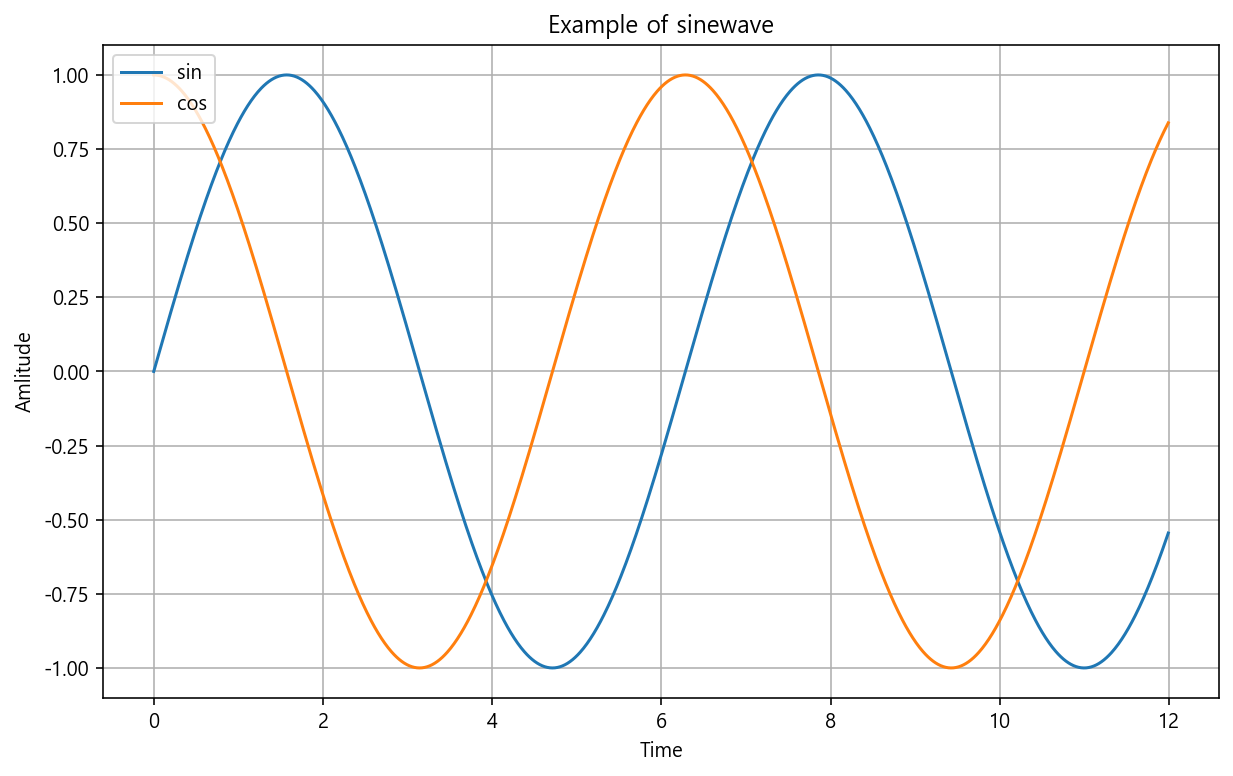

In [130]:
def draw_graph():
    plt.figure(figsize=(10, 6))
    plt.plot(x, np.sin(t), label="sin")
    plt.plot(x, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc=2) # 범례
    plt.title("Example of sinewave")
    plt.xlabel("Time")
    plt.ylabel("Amlitude") # 진폭
    plt.show()
    
draw_graph()

### 예제2: 그래프 커스텀

In [131]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

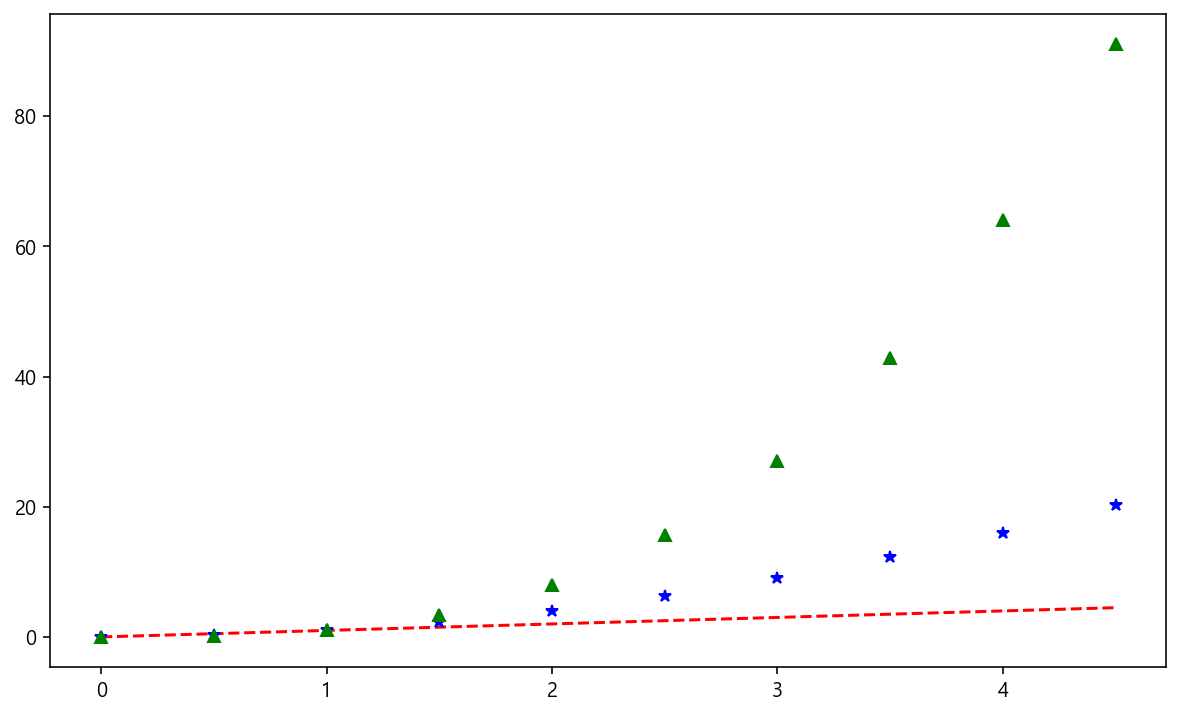

In [133]:
plt.figure(figsize=(10,6))
plt.plot(t, t, "r--") # red ---
plt.plot(t, t**2, "b*") # blus square
plt.plot(t, t**3, "g^") # green *
plt.show()

In [137]:
t = list(range(0, 7))
y = [1,4,1,2,3,6,0]
t

[0, 1, 2, 3, 4, 5, 6]

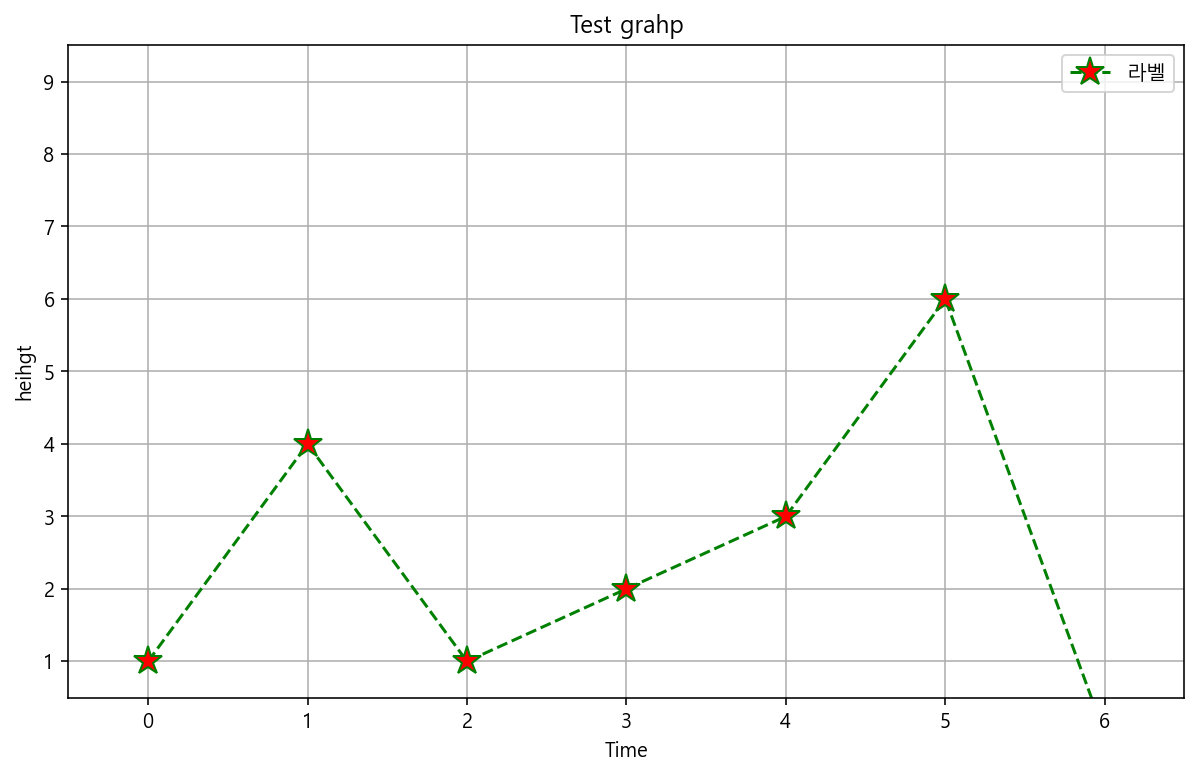

In [147]:
plt.figure(figsize=(10,6))
plt.plot(
    t,
    y,
    color="green",
    linestyle="dashed",
    marker="*",
    markerfacecolor="red",
    markersize=15,
    label="라벨"
)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.title("Test grahp")
plt.xlabel("Time")
plt.ylabel("heihgt")
plt.grid(True)
plt.legend()
plt.show()

### 예제3: scatter plot

In [150]:
import random
t = np.array(range(0,10))
y = [ random.randint(0, 6) for _ in range(0,10) ]
t, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), [1, 3, 4, 3, 3, 5, 6, 1, 5, 5])

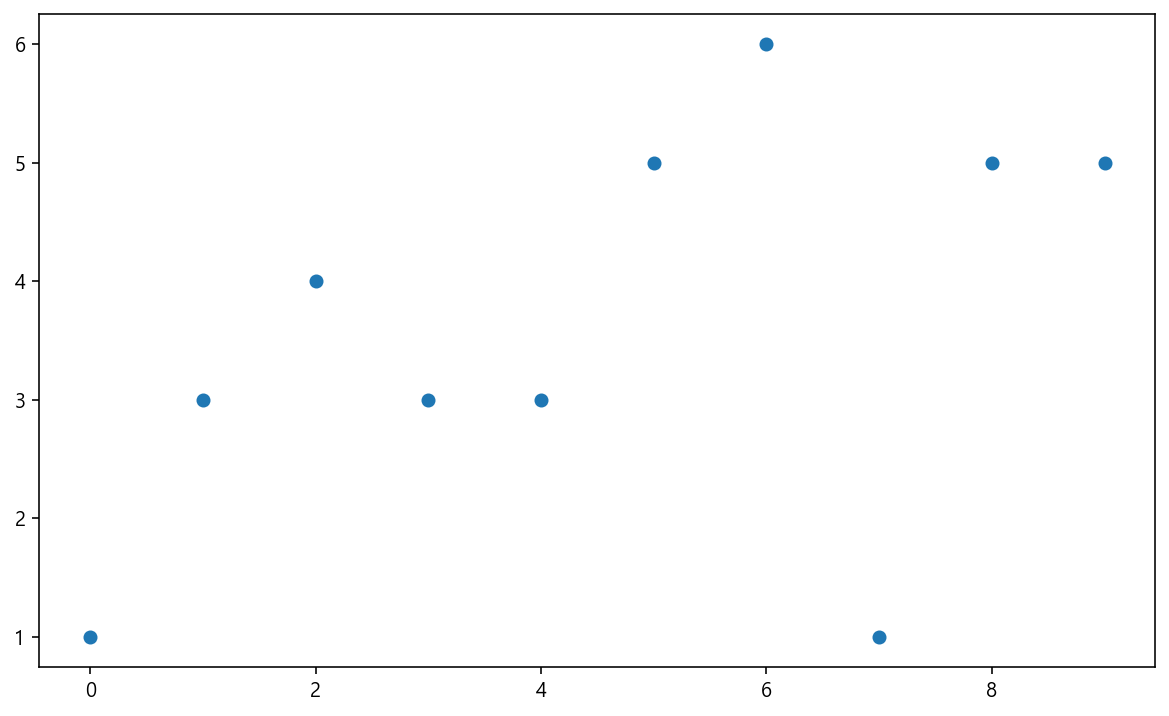

In [152]:
def draw_graph():
    plt.figure(figsize=(10,6))
    plt.scatter(t, y)
    plt.show()
    
draw_graph()

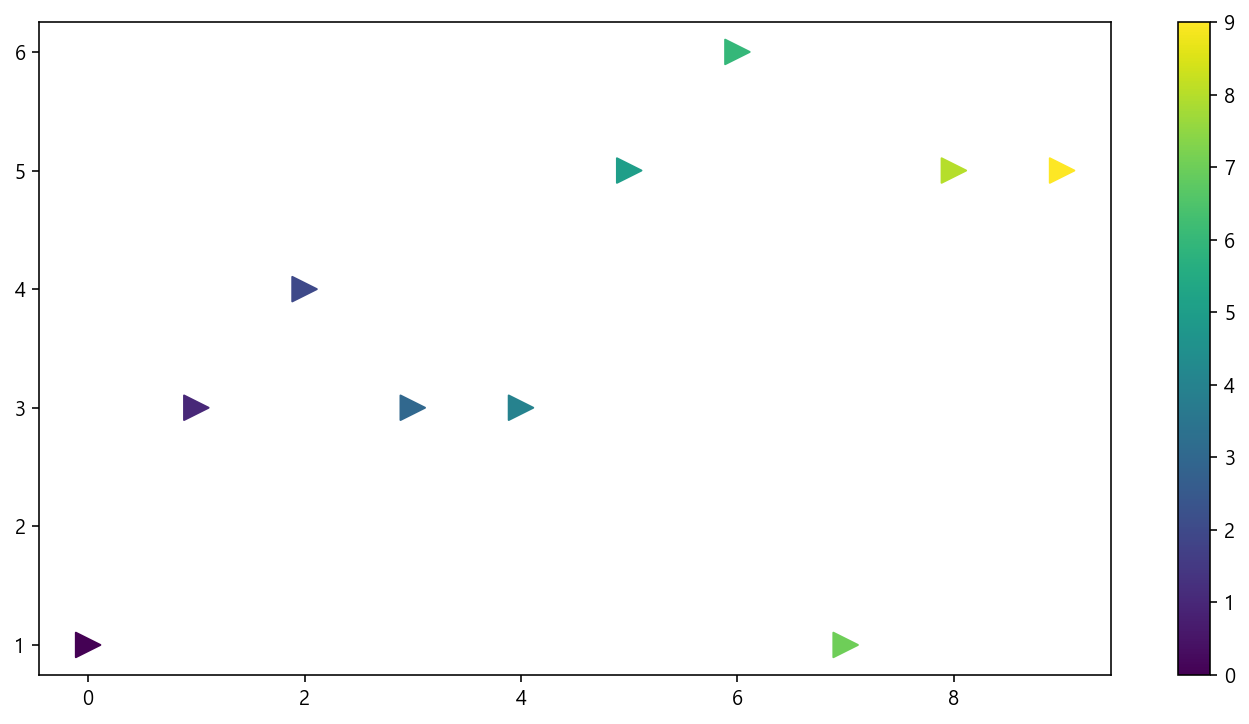

In [157]:
colormap = t

def draw_graph():
    plt.figure(figsize=(12, 6))
    plt.scatter(t, y, s=150, c=colormap, marker=">")
    plt.colorbar()
    plt.show()
    
draw_graph()

### 예제4 : Pandas에서 Plot 그리기
- matplotlib 을가져와서 사용

In [158]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

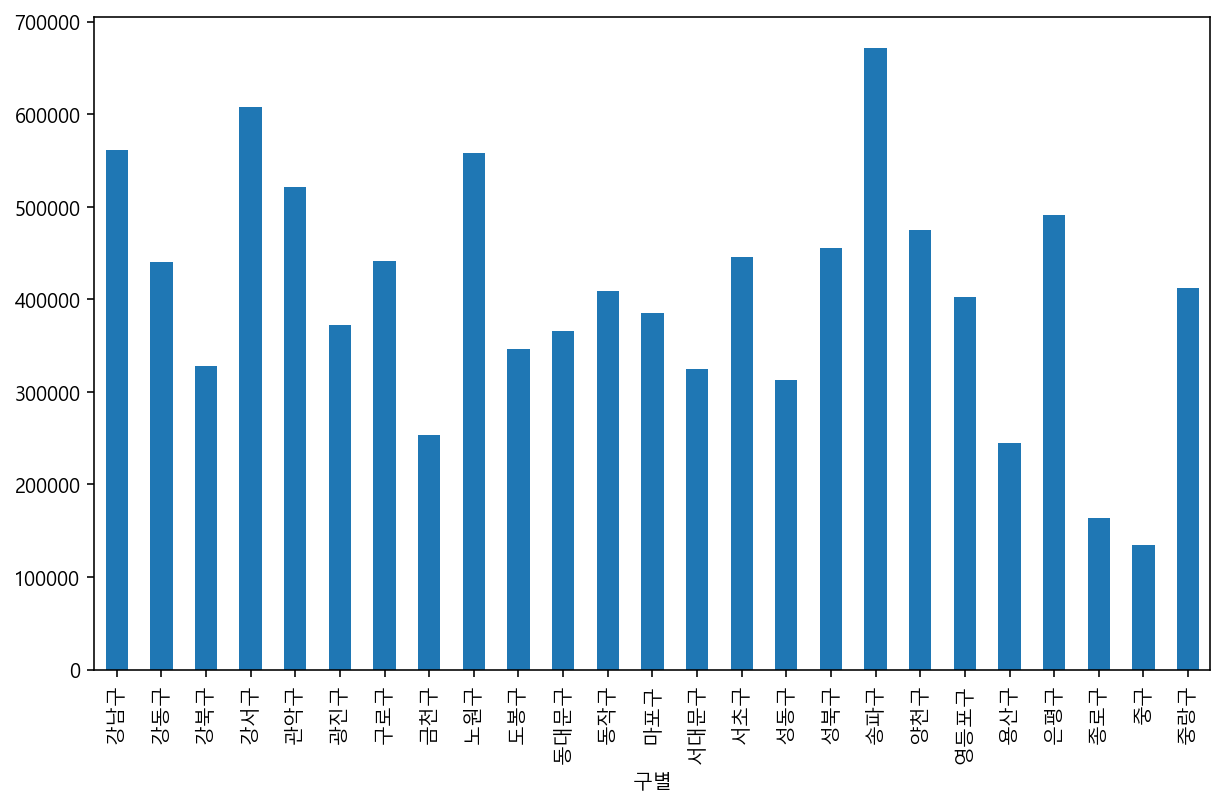

In [160]:
result["인구수"].plot(kind="bar", figsize=(10,6))

<AxesSubplot:ylabel='구별'>

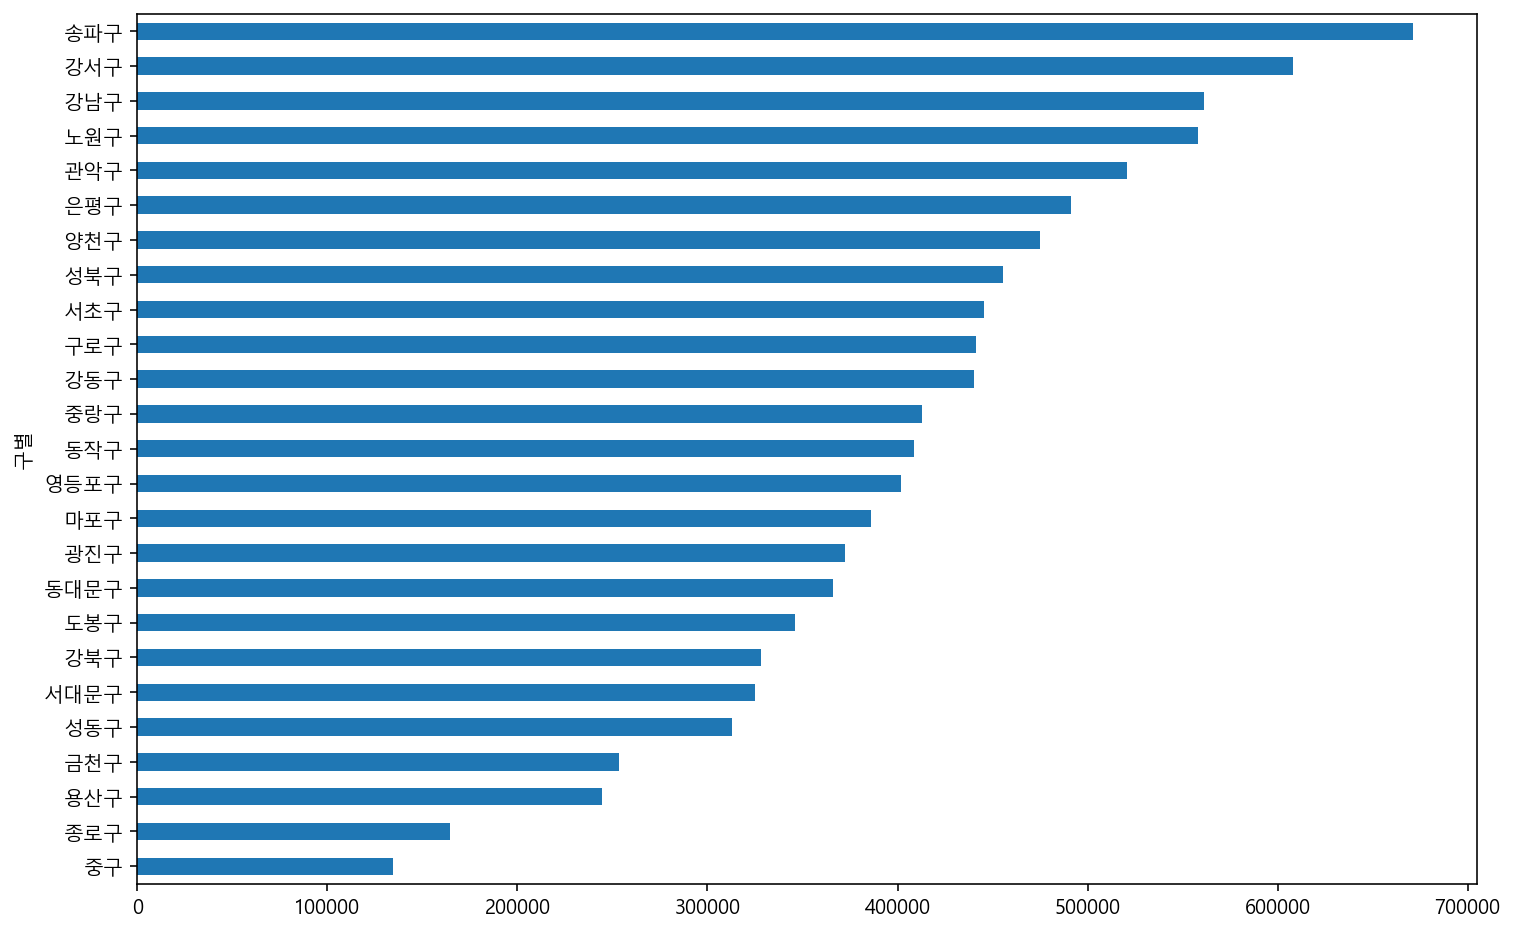

In [167]:
result.sort_values(by=["인구수"])["인구수"].plot(kind="barh", figsize=(12,8)) # barh 가로 horizon

In [168]:
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family=font_name)
get_ipython().run_line_magic("matplotlib", "inline")

In [169]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

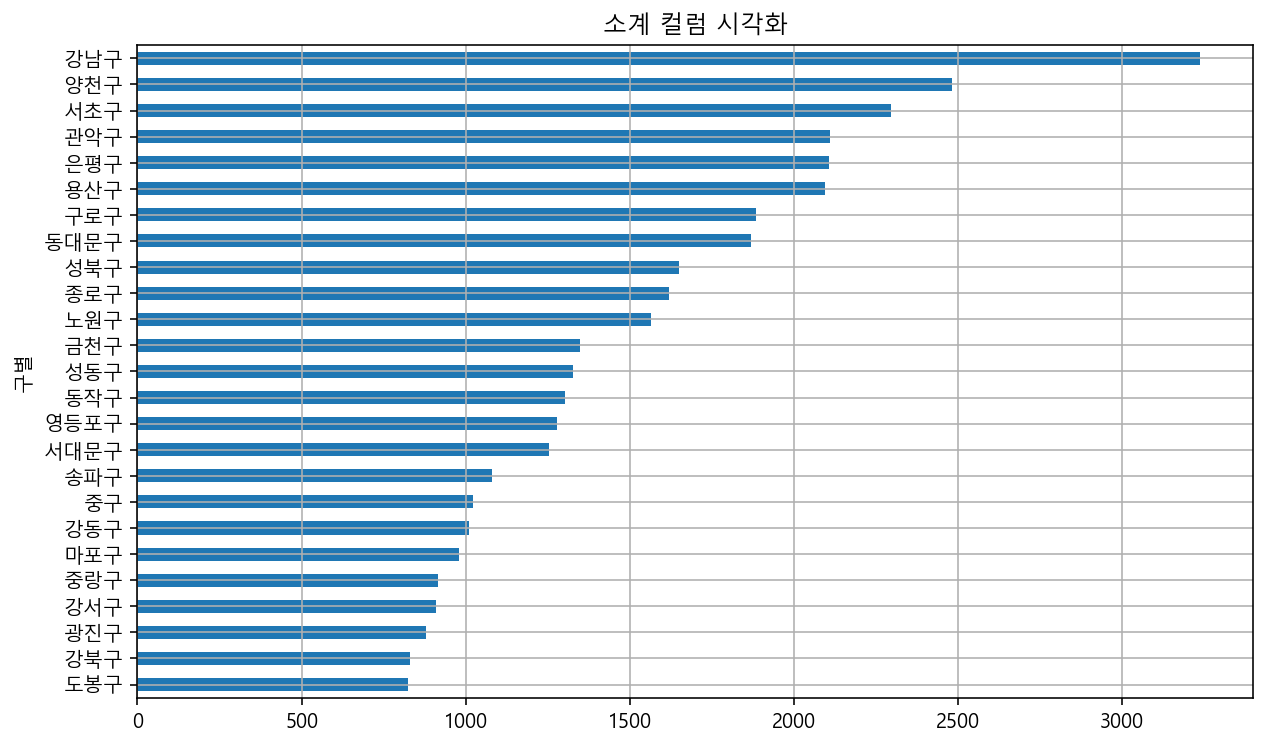

In [177]:
# ; -> 세미콜론 사용
def draw_graph():
    result["소계"].sort_values().plot(
        kind="barh", 
        grid=True, 
        figsize=(10,6),
        title="소계 컬럼 시각화"
    );
    
draw_graph()

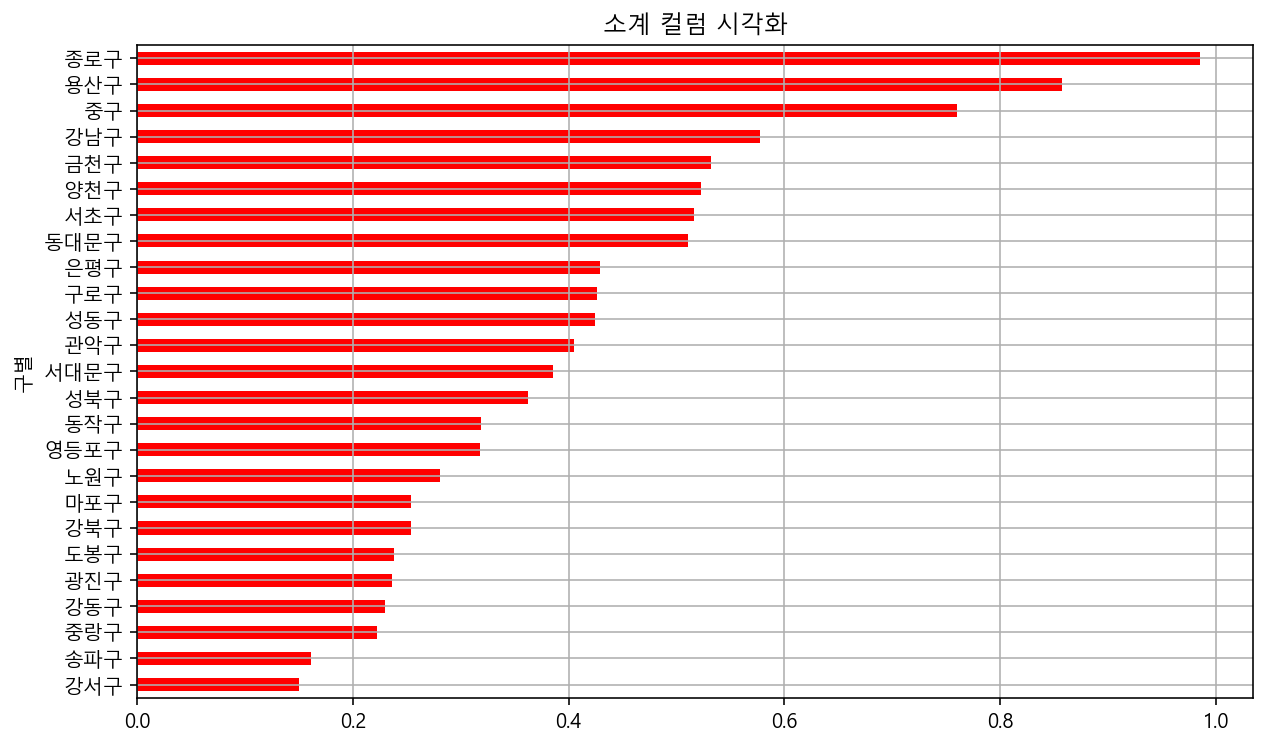

In [187]:
# ; -> 세미콜론 사용
def draw_graph():
    result["CCTV비율"].sort_values().plot(
        kind="barh", 
        grid=True, 
        figsize=(10,6),
        title="소계 컬럼 시각화",
        color="red",
    );
    
draw_graph()

## 6.데이터 경향 표시

In [189]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리

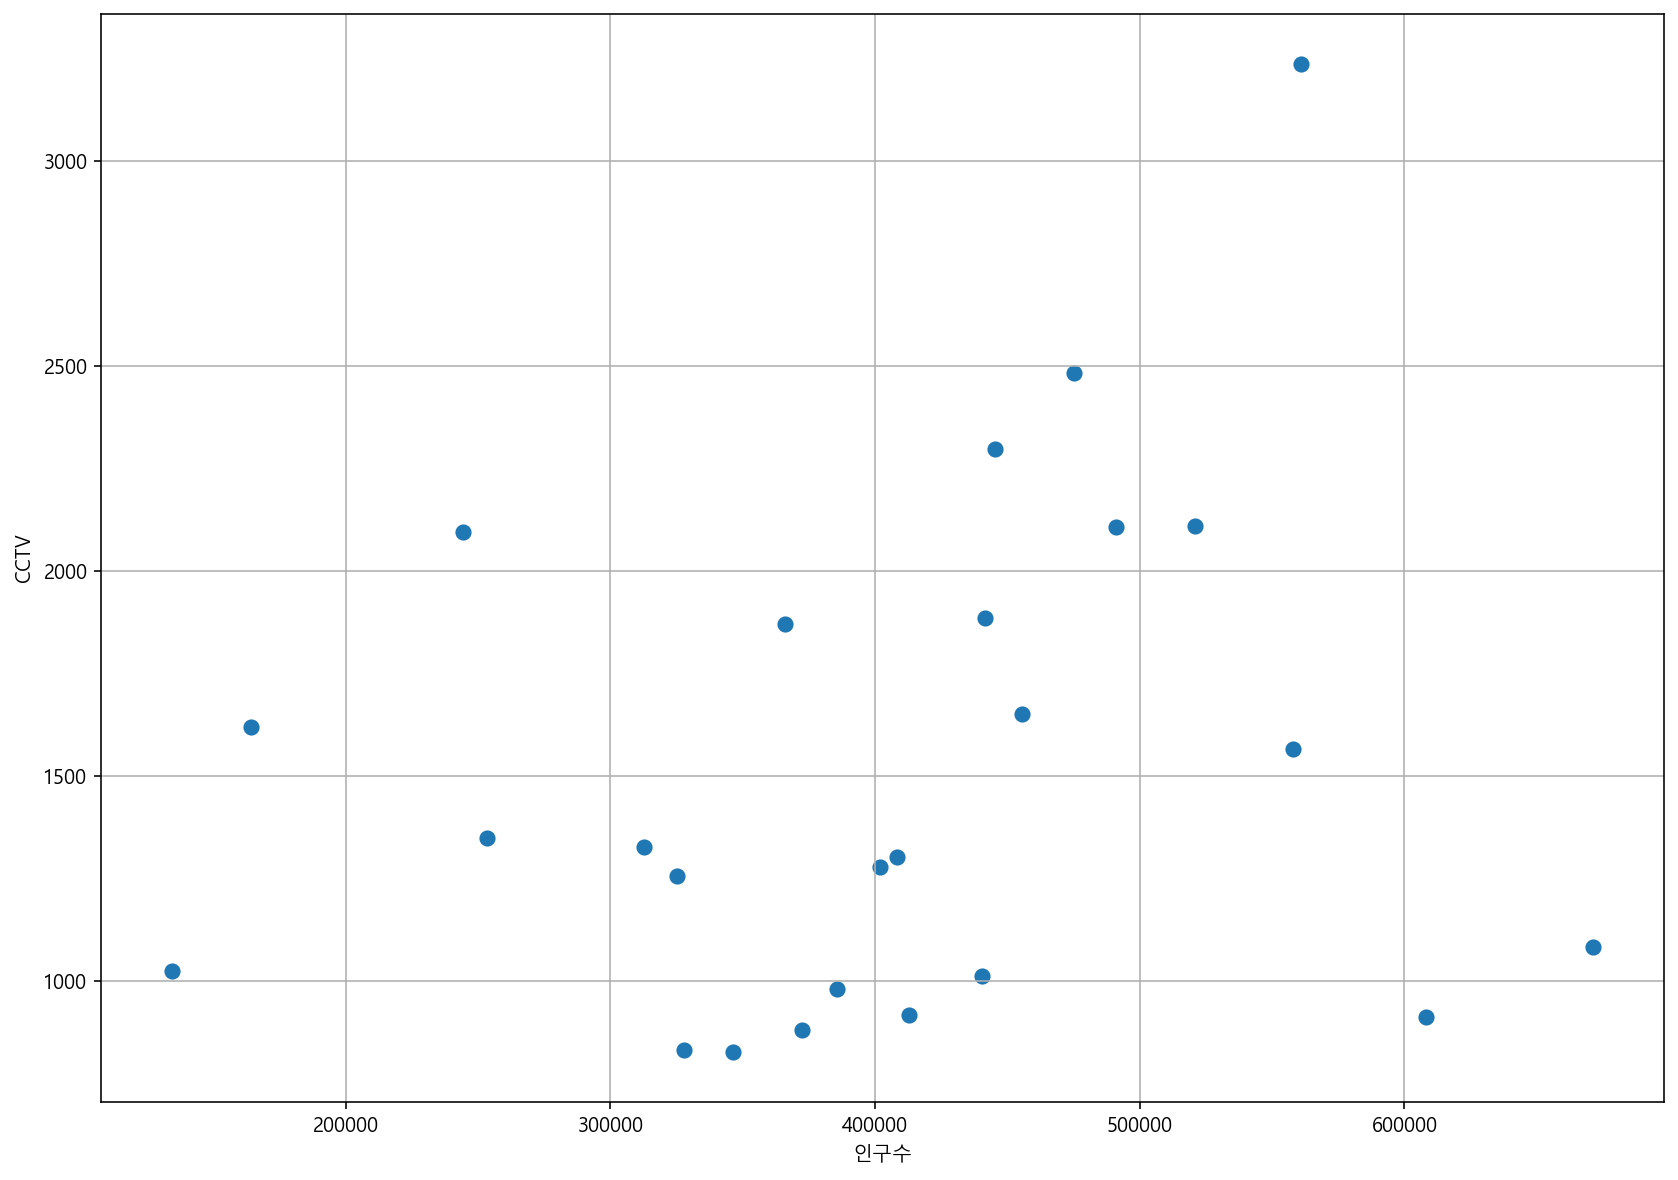

In [193]:
def draw_graph():
    plt.figure(figsize=(14,10))
    plt.scatter(result["인구수"], result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

draw_graph()

#### Numpy를 이용한 1차 직선 만들기
- np.ployfit(): 직선을 구성하기 위한 계수를 계산
- np.ploy1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [194]:
import numpy as np

In [207]:
fp1 = np.polyfit(result["인구수"], result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [208]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [209]:
f1(400000)

1509.7809252413338

In [215]:
fx = np.linspace(100000, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

- 경향선을 그리기 위한 X데이터 생성
- np.linspace(a, b, n) : a부터 b까지 n개의 등간격 데이터 생성

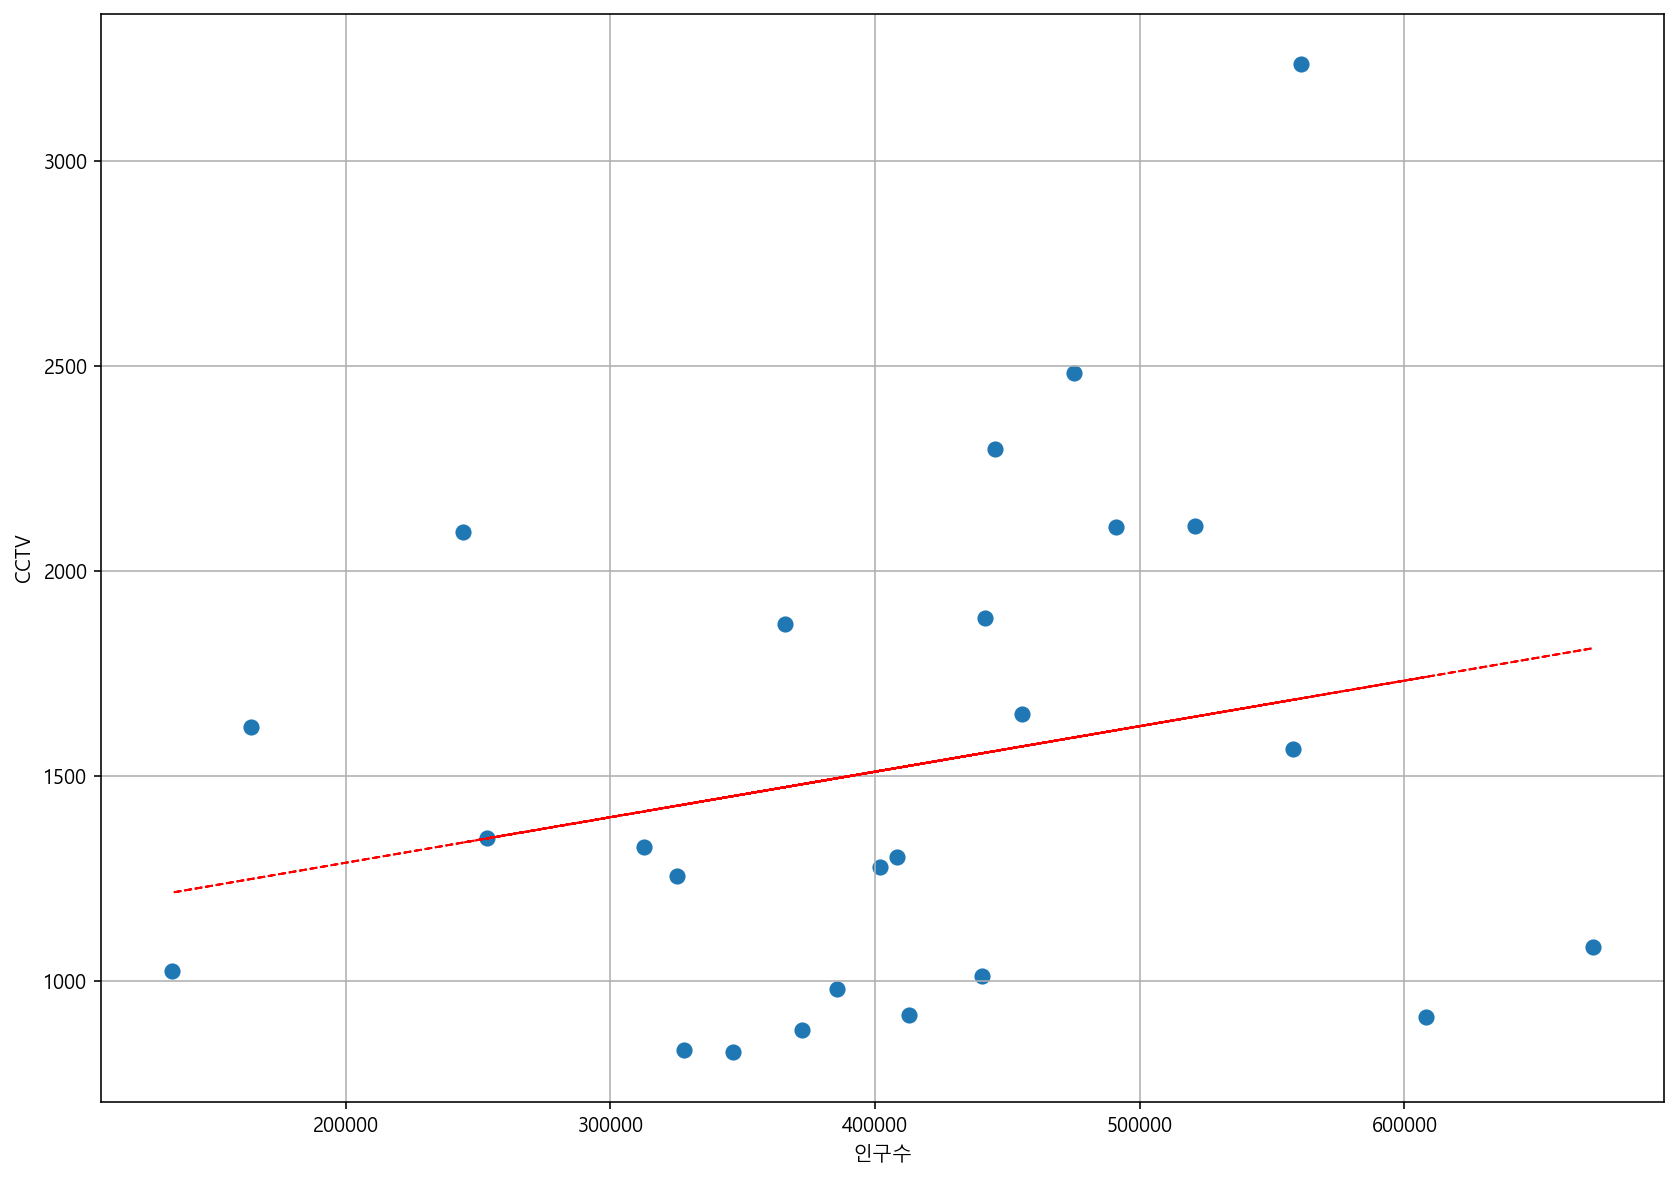

In [217]:
def draw_graph():
    plt.figure(figsize=(14,10))
    plt.scatter(result["인구수"], result["소계"], s=50)
    plt.plot(result["인구수"], f1(result["인구수"]), ls="dashed", lw=1, color="red")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

draw_graph()

## 7. 강조하고 싶은 데이터를 시각화 해보자

### 그래프 다듬기 
####  경향과의 오차 만들기
- 경향(trend) 과의 오차를 만들기
- 경향은 f1 함수에 해당 인구를 입력
- f1(result["인구수"])

In [221]:
fp1 = np.polyfit(result["인구수"], result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [222]:
result["오차"] = result["소계"] - f1(result["인구수"])

In [223]:
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [224]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = result.sort_values(by="오차", ascending=False) # 내림차순
df_sort_t = result.sort_values(by="오차", ascending=True) # 오름차순

In [225]:
# 경향 대비 CCTV가 많은 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [226]:
# 경향 대비 CCTV가 적은 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [228]:
from matplotlib.colors import ListedColormap

# colormap을 사용자 정의로 세팅
color_map = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498ab", "#3489db"]
my_cmap = ListedColormap(color_map)

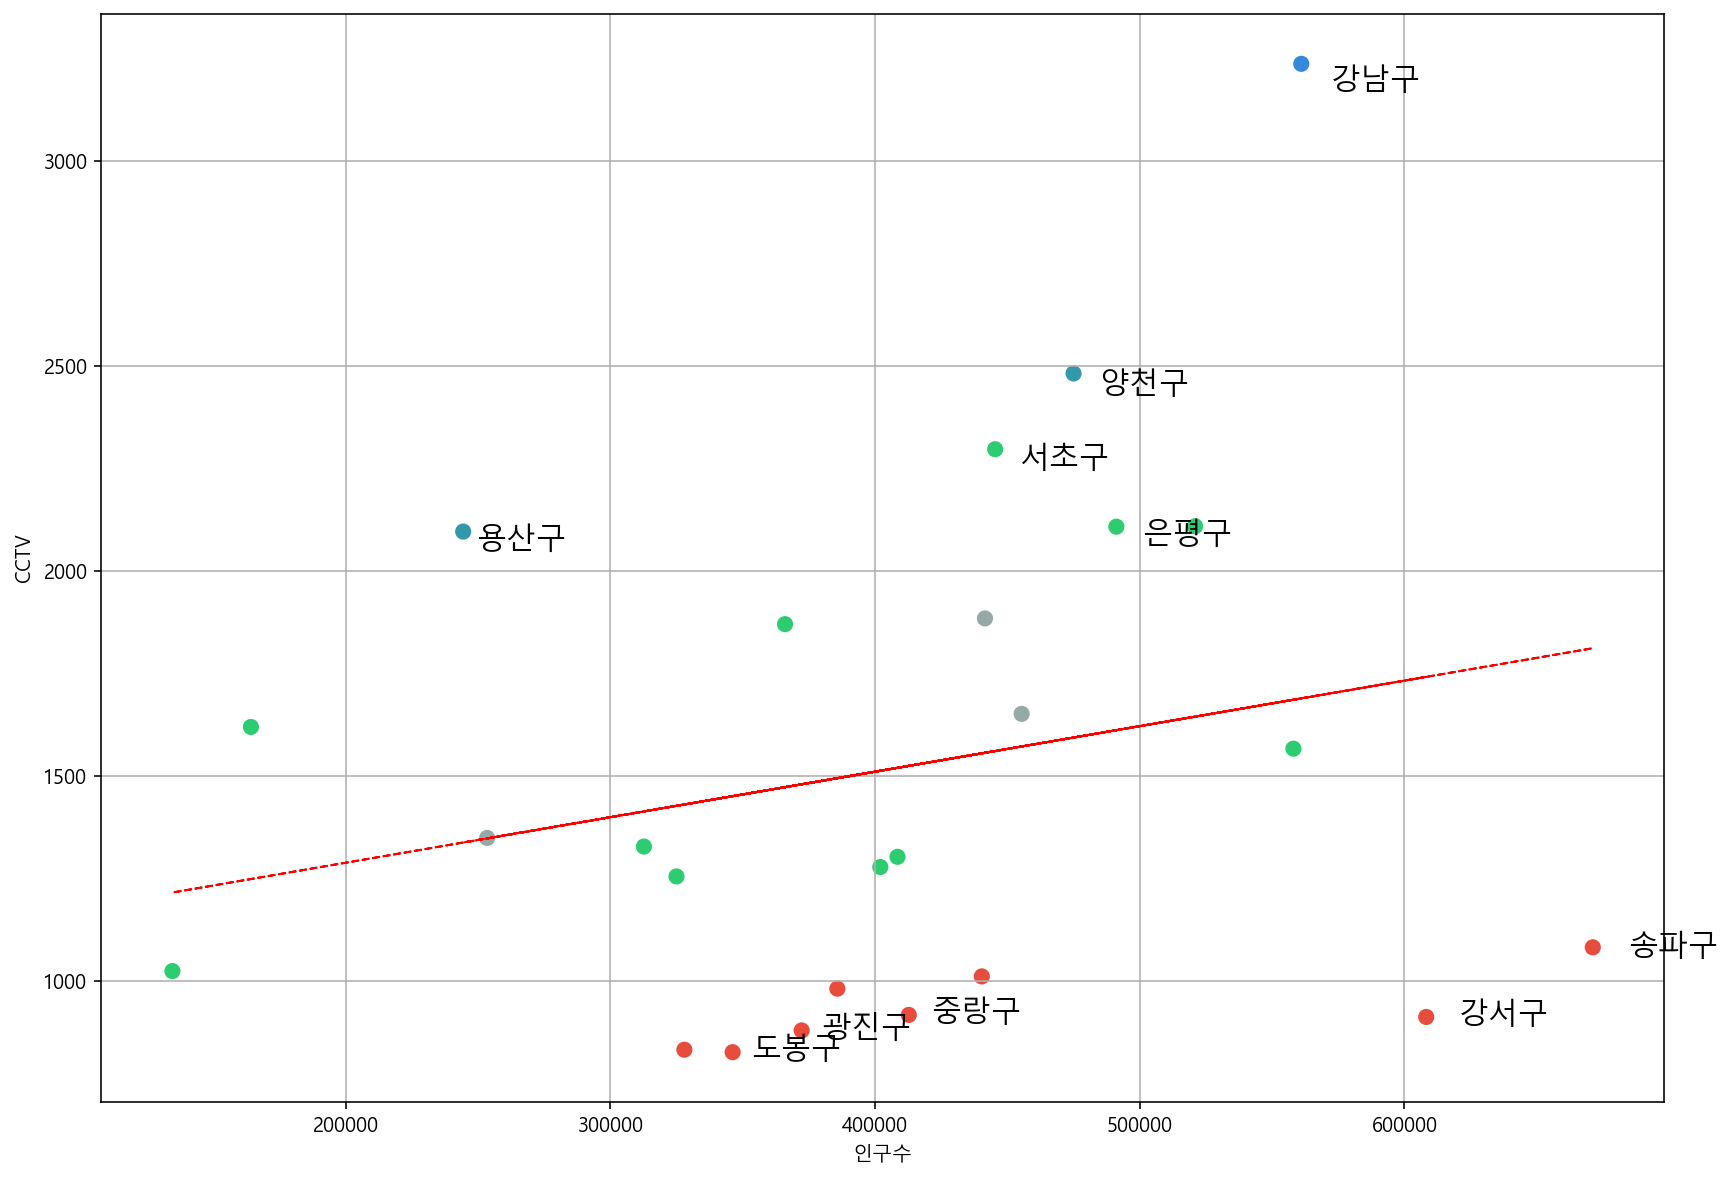

In [238]:
def draw_graph():
    plt.figure(figsize=(14,10))
    plt.scatter(result["인구수"], result["소계"], s=50, c=result["오차"], cmap=my_cmap)
    plt.plot(result["인구수"], f1(result["인구수"]), ls="dashed", lw=1, color="red")
    
    for num in range(0,5):
        plt.text(
            df_sort_f["인구수"][num] * 1.02, # x좌표
            df_sort_f["소계"][num] * 0.98, # y좌표
            df_sort_f.index[num], # 인덱스 이름(title)
            fontsize=15
        )
        
    for num in range(0,5):
        plt.text(
            df_sort_t["인구수"][num] * 1.02, 
            df_sort_t["소계"][num] * 0.98, 
            df_sort_t.index[num], 
            fontsize=15
        )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

draw_graph()

In [231]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [232]:
result["인구수"][0]

561052

In [233]:
result["소계"][0]

3238

In [234]:
result.index[0]

'강남구'

In [239]:
result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")